In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from acquire import get_titanic_data
#from prepare import prep_titanic_data
import explore

In [2]:
df=get_titanic_data()

In [3]:
df.head(
)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [4]:
df= df[pd.notna(df.age)]
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [5]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class            object
deck             object
embark_town      object
alone             int64
dtype: object

In [6]:
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df[['survived']])

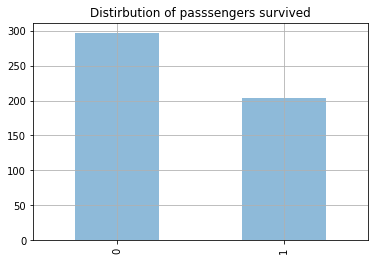

In [7]:
train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

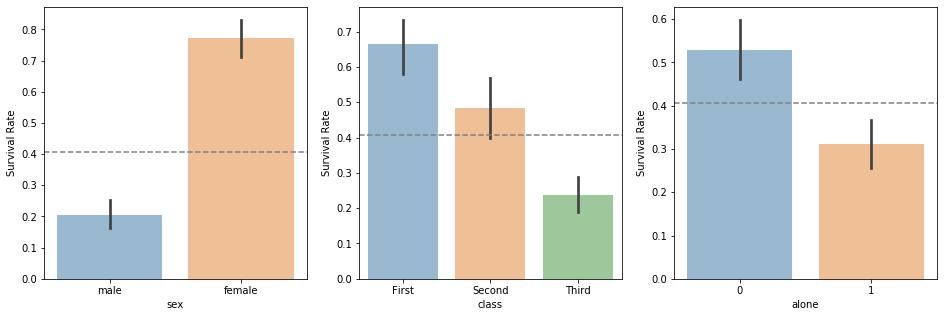

In [8]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

NameError: name 'train_df' is not defined

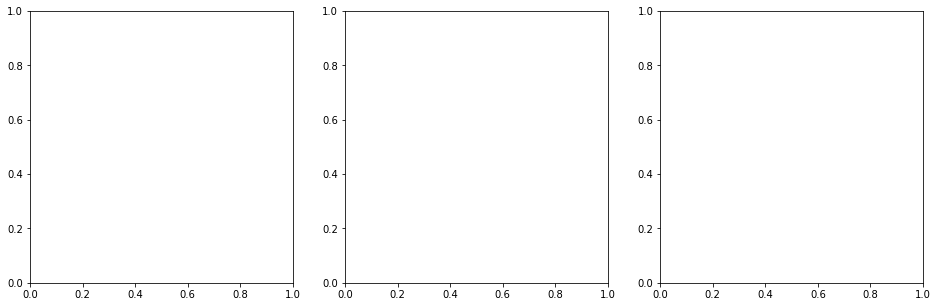

In [9]:
df_titanic= explore.barplot(df, ['sex', 'class', 'alone'])

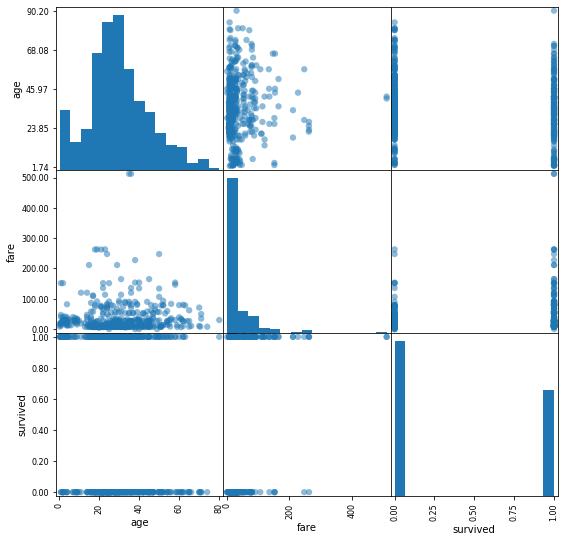

In [11]:
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

cmap = cm.get_cmap('gnuplot')
axes = pd.plotting.scatter_matrix(
    train_df[['age','fare','survived']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().